In [1]:
# ! Followed tutorial("https://www.youtube.com/watch?v=TF2Nx_ifmrU")

import yfinance as yf
import os
import pandas as pd

In [2]:
# * Configuration
ticker_name = "TSLA"
related_ticker_names = [
    "SPY", 
    "QQQ", 
    "ITOT", 
    "VTI", 
    "AMZN", 
    "AAPL", 
    "AMC", 
    "NVDA", 
    "MSFT", 
    "ROKU", 
    "GOOGL", 
    "NFLX",
    "DOGE-USD",
    "BTC-USD",
    "ETH-USD"
]
related_ticker_predictor_fields = ["open", "high", "low", "close", "volume"]
# related_ticker_predictor_fields = ["close", "volume"]
predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
# predictors = ["close", "volume", "edit_count", "sentiment", "neg_sentiment"]
period = '2y'
backtest_start = 7
backtest_step = 1
data_split_point = 73 # cutoff in days ago - want to follow best practices: 80% train, 20% test -- for 2y period, want 73 days ago 

In [3]:
# * Get historical & related data, clean all data
ticker = yf.Ticker(ticker_name)

historical_data_related_tickers = related_ticker_names.copy()
for i in range(0,len(related_ticker_names)):
    related_ticker = historical_data_related_tickers[i]
    related_ticker = yf.Ticker(related_ticker).history(period=period)
    del related_ticker["Dividends"]
    del related_ticker["Stock Splits"]
    related_ticker.index = pd.to_datetime(related_ticker.index.tz_localize(None))
    related_ticker.columns = [c.lower() for c in related_ticker.columns]
    historical_data_related_tickers[i] = related_ticker.dropna()

In [4]:
historical_data = ticker.history(period=period)

In [5]:
del historical_data["Dividends"]
del historical_data["Stock Splits"]

In [6]:
historical_data.index = pd.to_datetime(historical_data.index.tz_localize(None))

In [7]:
historical_data.columns = [c.lower() for c in historical_data.columns]

<Axes: xlabel='Date'>

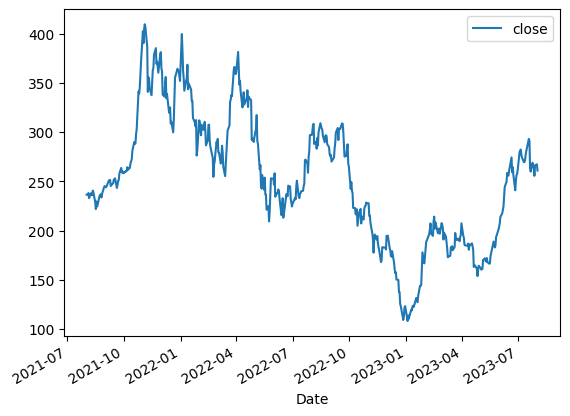

In [8]:
historical_data.plot.line(y="close", use_index=True)

In [9]:
# * Get Wikipedia edits & merge into historical dataframe
wiki = pd.read_csv("wikipedia_edits.csv",index_col=0, parse_dates=True)
historical_data = historical_data.merge(wiki, left_index=True, right_index=True)

In [10]:
# * Merge related stock tickers
for i in range(0,len(related_ticker_names)):
    for related_predictor in related_ticker_predictor_fields:
        historical_data[f"{related_ticker_names[i]}_{related_predictor}"] = historical_data_related_tickers[i][related_predictor]

In [11]:
historical_data

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,SPY_open,SPY_high,...,BTC-USD_open,BTC-USD_high,BTC-USD_low,BTC-USD_close,BTC-USD_volume,ETH-USD_open,ETH-USD_high,ETH-USD_low,ETH-USD_close,ETH-USD_volume
2021-08-02,233.333328,242.313339,232.800003,236.556671,100847400,4.366667,-0.010681,0.044865,427.191076,427.763455,...,39907.261719,40419.179688,38746.347656,39201.945312,25595265436,2557.774658,2665.730957,2511.375244,2610.153320,22162754104
2021-08-03,239.666672,240.883331,233.669998,236.580002,64860900,4.333333,-0.010681,0.044865,425.347829,428.103021,...,39178.402344,39750.031250,37782.050781,38152.980469,26189830450,2609.413086,2630.314209,2449.353516,2502.349609,22696753413
2021-08-04,237.000000,241.633331,236.309998,236.973328,51007800,4.333333,-0.010681,0.044865,426.647804,427.947787,...,38213.332031,39952.296875,37589.164062,39747.503906,25372562724,2508.544922,2764.443604,2463.469482,2724.619873,25038698173
2021-08-05,238.666672,240.316666,237.136673,238.210007,38758800,4.300000,-0.010681,0.044865,427.074672,428.656004,...,39744.515625,41341.933594,37458.003906,40869.554688,35185031017,2725.669678,2840.430664,2540.684082,2827.328857,31057928075
2021-08-06,237.300003,238.776672,232.543335,233.033340,46869000,4.300000,-0.010681,0.044865,428.898517,429.713430,...,40865.867188,43271.660156,39932.179688,42816.500000,38226483046,2827.503418,2944.903320,2727.792725,2890.941650,26528577879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,95856200,0.966667,-0.006656,0.050000,454.470001,456.989990,...,29225.759766,29675.552734,29113.912109,29354.972656,13497554655,1857.696533,1886.974121,1849.436890,1872.159912,5781548155
2023-07-27,268.309998,269.130005,255.300003,255.710007,103697300,1.133333,0.004056,0.050000,459.019989,459.440002,...,29353.798828,29560.966797,29099.351562,29210.689453,10770779217,1872.086304,1885.591553,1855.321533,1860.357178,4291339248
2023-07-28,259.859985,267.250000,258.230011,266.440002,111446000,1.166667,0.004056,0.050000,455.880005,457.779999,...,29212.164062,29521.513672,29125.845703,29319.246094,11218474952,1860.702515,1881.457275,1857.048950,1874.744873,3800973336
2023-07-31,267.480011,269.079987,263.779999,267.429993,84582200,1.300000,0.030389,0.050000,457.410004,458.160004,...,29278.314453,29489.873047,29131.578125,29230.111328,11656781982,1861.755249,1875.629395,1851.915405,1856.162354,4391613314


In [12]:
# * Add predictors
# related
# tomorrow
# target
        
historical_data["tomorrow"] = historical_data["close"].shift(-1)
historical_data["target"] = (historical_data["tomorrow"] > historical_data["close"]).astype(int)

In [13]:
# * Verify up/down values for target are evenly distributed
historical_data["target"].value_counts()

target
1    272
0    231
Name: count, dtype: int64

<Axes: >

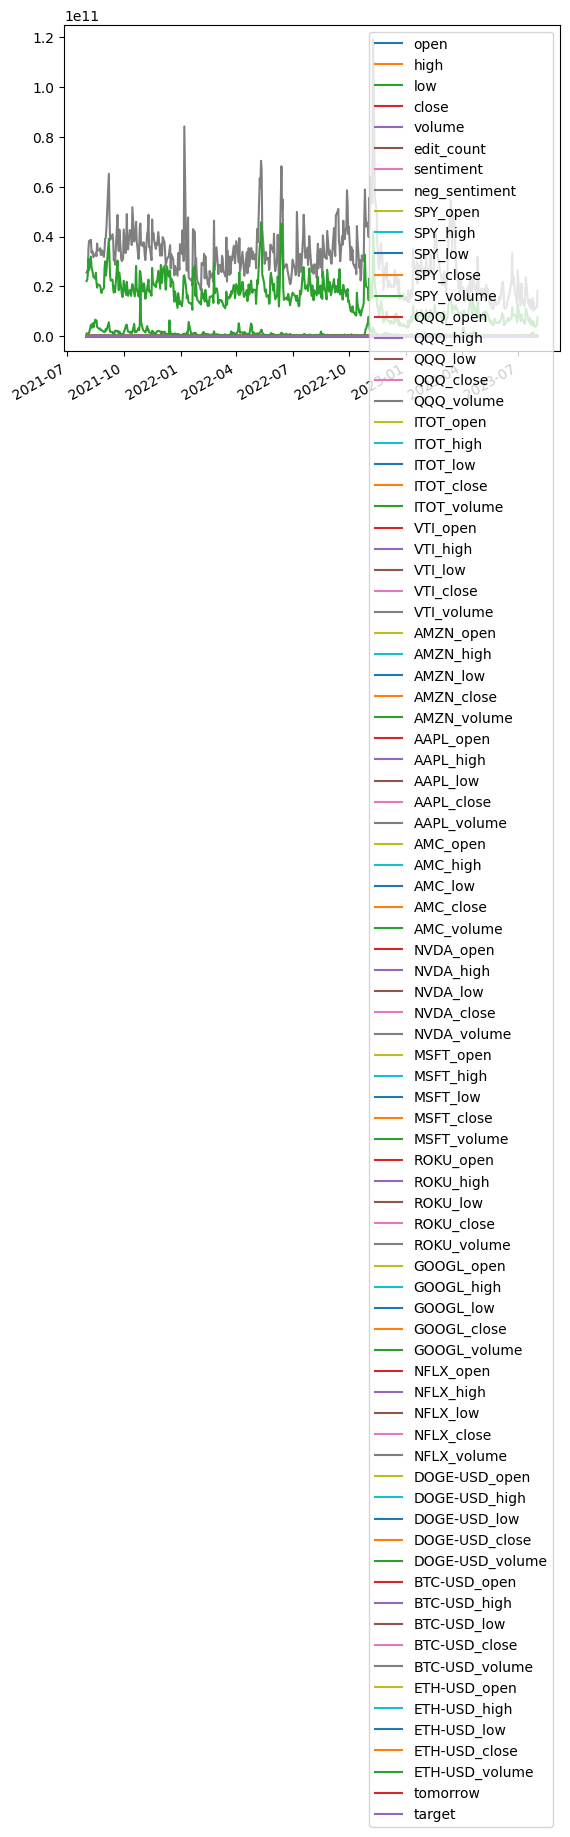

In [14]:
historical_data.plot()

In [15]:
historical_data.to_csv("historical_data.csv")